In [1]:
pip install sumy

     |████████████████████████████████| 92kB 2.9MB/s 
     |████████████████████████████████| 10.0MB 7.6MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=a09a5c9ff3e3dfd2b24ed989d95ac1310506d063a05d8500da9965f2e84c88ab
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21684 sha256=77fe3e94dfc763deb1d410bc118013a636c473bb9ab3826f6a9bb9a607a387d3
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
Successfully built pycountry breadability


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
pip install tika

  Created wheel for tika: filename=tika-1.24-cp36-none-any.whl size=32885 sha256=ba8ce25ce7b6b605abdc0d6063eb0aa53602b0ff20c93dd65e93b20325797aa0
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika


In [5]:
from tika import parser

rawText = parser.from_file('ReinforcementLearningblog.pdf')
rawText2 = parser.from_file('Sutton Book.pdf')
rawList = rawText['content'].splitlines()
rawList2 = rawText2['content'].splitlines()



2020-04-29 06:02:24,821 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-04-29 06:02:33,224 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-04-29 06:02:34,848 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [0]:
rawList = [item for item in rawList if item.strip()] 
rawList2 = [item for item in rawList2 if item.strip()] 


In [7]:
rawList_str = ' '.join(rawList) 
rawList_str2 = ' '.join(rawList2)

final =  rawList_str + rawList_str2
print(rawList_str)
print(rawList_str2)

Reinforcement Learning is learning the best actions on the basis of  rewards and punishment. But when we wear our technical goggles,  then Reinforcement Learning is defined using three basic concepts  i.e. states, actions, and rewards.  Here the “state” defines a situation in which an agent is present  who performs some “actions” and based upon these actions the  agent receives either rewards or punishment.  When we consider the example of the dog, there we have the  owner of the dog and the “dog” (Agent) itself. Now when the  owner of the dog is present in the garden with the dog, he/she  throws away a ball. This throwing away of the ball is the “state”  for the agent and now the dog will run after the ball which will be  the “action”.  The result will be an appreciation or food for the dog from the  owner which will be “reward” as a result of the action and if the  dog does not go after the ball another alternate action then it may  get some “punishment”. Therefore, this is what Rein

In [0]:
from nltk import ngrams
n = 7
total_grams = []
number_of_grams = ngrams(final.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [9]:

print(total_grams[:10])

[('Reinforcement', 'Learning', 'is', 'learning', 'the', 'best', 'actions'), ('Learning', 'is', 'learning', 'the', 'best', 'actions', 'on'), ('is', 'learning', 'the', 'best', 'actions', 'on', 'the'), ('learning', 'the', 'best', 'actions', 'on', 'the', 'basis'), ('the', 'best', 'actions', 'on', 'the', 'basis', 'of'), ('best', 'actions', 'on', 'the', 'basis', 'of', 'rewards'), ('actions', 'on', 'the', 'basis', 'of', 'rewards', 'and'), ('on', 'the', 'basis', 'of', 'rewards', 'and', 'punishment.'), ('the', 'basis', 'of', 'rewards', 'and', 'punishment.', 'But'), ('basis', 'of', 'rewards', 'and', 'punishment.', 'But', 'when')]


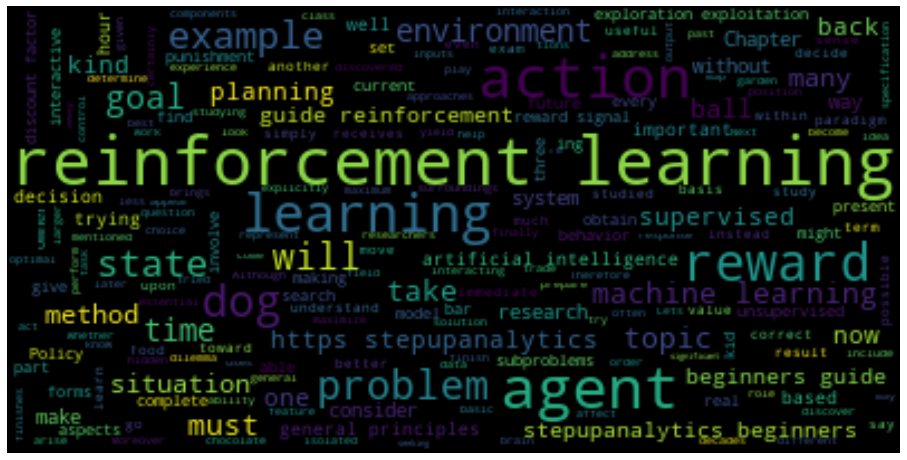

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(final)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
import collections
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

import nltk
nltk.download('stopwords')

def word_tokenizer(text):
    #tokenizes and stems the text
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
    return tokens

def cluster_sentences(sentences, nb_of_clusters=5):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenizer,
                                            stop_words=stopwords.words('english'),
                                            max_df=0.9,
                                            min_df=0.1,
                                            lowercase=True)
    #builds a tf-idf matrix for the sentences
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    kmeans = KMeans(n_clusters=nb_of_clusters)
    kmeans.fit(tfidf_matrix)
    clusters = collections.defaultdict(list)
    for i, label in enumerate(kmeans.labels_):
            clusters[label].append(i)
    return dict(clusters)

if __name__ == "__main__":
    sentences = rawList2

    nclusters= 10
    clusters = cluster_sentences(sentences, nclusters)
    for cluster in range(nclusters):
            print ("cluster ",cluster,":")
            for i,sentence in enumerate(clusters[cluster]):
                    print ("\tsentence ",i,": ",sentences[sentence])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


cluster  0 :
	sentence  0 :  actions influence its later inputs. Moreover, the learner is not told which ac-
	sentence  1 :  but also the next situation and, through that, all subsequent rewards. These
	sentence  2 :  paradigms, but they do not. Although one might be tempted to think of rein-
	sentence  3 :  studied by mathematicians for many decades (see Chapter 2). For now, we
	sentence  4 :  without addressing how they might fit into a larger picture. For example,
	sentence  5 :  would come from. Although these approaches have yielded many useful results,
	sentence  6 :  ence their environments. Moreover, it is usually assumed from the beginning
	sentence  7 :  optimization, and other mathematical subjects. For example, the ability of
	sentence  8 :  intelligence back toward simple general principles. Since the late 1960’s, many
	sentence  9 :  bers of special purpose tricks, procedures, and heuristics. It was sometimes
	sentence  10 :  lion, or one billion, then it would become int

In [0]:
textfile = open('Input.txt', 'w')
textfile.write(rawList_str)
textfile.write(rawList_str2)
textfile.close()

In [66]:
from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


LANGUAGE = "english"
SENTENCES_COUNT = 20


if __name__ == "__main__":
    url = "https://en.wikipedia.org/wiki/Automatic_summarization"
    #parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
    # or for plain text files
    parser = PlaintextParser.from_file("Input.txt", Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)

    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(sentence)
       

But when we wear our technical goggles,  then Reinforcement Learning is defined using three basic concepts  i.e. states, actions, and rewards.
Moreover, the learner is not told which ac- tions to take, as in many forms of machine learning, but instead must discover which actions yield the most reward by trying them out.
A full specification of reinforcement learning problems in terms of optimal control of Markov decision processes must wait until Chapter 3, but the basic idea is simply to capture the most important aspects of the real problem facing a learning agent interacting with its environment to achieve a goal.
The object of this kind of learning is for the system to extrapolate, or generalize, its responses so that it acts correctly in situations not present in the training set.
In interactive problems it is often impractical to obtain examples of desired behavior that are both correct and representative of all the situa- tions in which the agent has to act.
For now, we simply n

In [0]:
from tika import parser

input = parser.from_file('Sutton Book.pdf')
summary = parser.from_file('test.pdf')
inputFinal = input['content'].splitlines()
summaryFinal = summary['content'].splitlines()


inputFinal = [item for item in inputFinal if item.strip()] 
summaryFinal = [item for item in summaryFinal if item.strip()] 


FInput = ' '.join(inputFinal) 
FSum = ' '.join(summaryFinal)

Text(0.5, 1.0, 'Comparing number of words per sentence distribution in Original vs Summarixed text')

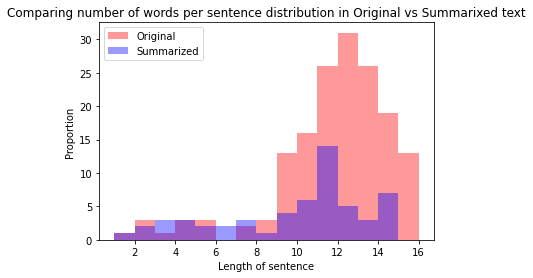

In [70]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer

%matplotlib inline
from matplotlib import pyplot as plt



tokenizer = RegexpTokenizer(r'\w+')

clinton_words = tokenizer.tokenize(FInput)
trump_words = tokenizer.tokenize(FSum)

clinton_sentences = FInput.replace("?", ".").split(".")
trump_sentences = FSum.replace("?", ".").split(".")


clin_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in inputFinal]
tr_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in summaryFinal]

clin_sent_len = [i for i in clin_sent_lenghs if i!=0]
tr_sent_len = [i for i in tr_sent_lenghs if i!=0]

plt.hist(clin_sent_len, bins=range(min(clin_sent_len), max(clin_sent_len) + 1, 1),
              alpha=0.4, color="red")
plt.hist(tr_sent_len, bins=range(min(tr_sent_len), max(tr_sent_len) + 1, 1), 
              alpha=0.4, color="blue")

labels = ['Original',"Summarized"]
plt.legend(labels)
plt.xlabel("Length of sentence")
plt.ylabel("Proportion")
plt.title("Comparing number of words per sentence distribution in Original vs Summarixed text")